In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Importing the dataset to be analyzed
df = pd.read_csv('energydata_complete.csv')

In [75]:
df = pd.read_csv('energydata_complete.csv')
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [76]:
# Rename columns
column_names = {'T1': 'Temp in kitchen ', 'RH_1': 'Humid in Kitchen',
'T2': 'Temp in LV', 'RH_2': 'Humid in LV',
'T3': 'Temp in LR', 'RH_3': 'Humid in LR',
'T4': 'Temp in OR', 'RH_4': 'Humid in OR',
'T5': 'Temp in BR', 'RH_5': 'Humid in BR',
'T6': 'Temp NS', 'RH_6': 'Humid NS',
'T7': 'Temp in IR', 'RH_7': 'Humid in IR',
'T8': 'Temp in TR', 'RH_8': 'Humid in TR',
'T9': 'Temp in PR', 'RH_9': 'Humid in PR',
'T_out': 'Temp from CWS', 'RH_out': 'Humid from CWS'}

In [77]:
df = df.rename(columns = column_names)

In [78]:
# Displaying the first five rows of the dataset
df.head()

,date,Appliances,lights,Temp in kitchen,Humid in Kitchen,Temp in LV,Humid in LV,Temp in LR,Humid in LR,Temp in OR,...,Temp in PR,Humid in PR,Temp from CWS,Press_mm_hg,Humid from CWS,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [23]:
df.shape

(19735, 28)

In [79]:
# Using the info method to see the data types in the dataset and number of missing values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              19735 non-null  object 
 1   Appliances        19735 non-null  int64  
 2   lights            19735 non-null  int64  
 3   Temp in kitchen   19735 non-null  float64
 4   Humid in Kitchen  19735 non-null  float64
 5   Temp in LV        19735 non-null  float64
 6   Humid in LV       19735 non-null  float64
 7   Temp in LR        19735 non-null  float64
 8   Humid in LR       19735 non-null  float64
 9   Temp in OR        19735 non-null  float64
 10  Humid in OR       19735 non-null  float64
 11  Temp in BR        19735 non-null  float64
 12  Humid in BR       19735 non-null  float64
 13  Temp NS           19735 non-null  float64
 14  Humid NS          19735 non-null  float64
 15  Temp in IR        19735 non-null  float64
 16  Humid in IR       19735 non-null  float6

In [72]:
df.isnull().sum()

date                0
lights              0
Temp in kitchen     0
Humid in Kitchen    0
Temp in LV          0
Humid in LV         0
Temp in LR          0
Humid in LR         0
Temp in OR          0
Humid in OR         0
Temp in BR          0
Humid in BR         0
Temp NS             0
Humid NS            0
Temp in IR          0
Humid in IR         0
Temp in TR          0
Humid in TR         0
Temp in PR          0
Humid in PR         0
Temp from CWS       0
Press_mm_hg         0
Humid from CWS      0
Windspeed           0
Visibility          0
Tdewpoint           0
rv1                 0
rv2                 0
dtype: int64

In [58]:
# prepare the training data
y = df['Temp NS']

x = df['Temp in LV']

In [59]:
model = LinearRegression()

In [60]:
model.fit(x_train, y_train)

LinearRegression()

In [61]:
y_pred = model.predict(x_test)
y_pred

array([ 2.15578912, 10.01116055,  1.87391554, ...,  4.24758774,
        8.69822311,  4.9893603 ])

In [62]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [52]:
print(f'MSE =>{round(mse, 2)}')
print(f'R2 =>{round(r2, 2)}')

MSE =>13.18
R2 =>0.64


In [63]:
reg_df = df[['Temp in LV','Temp NS']]

In [64]:
reg_df_sample = reg_df.sample(15, random_state =2)

<Axes: xlabel='Temp in LV', ylabel='Temp NS'>

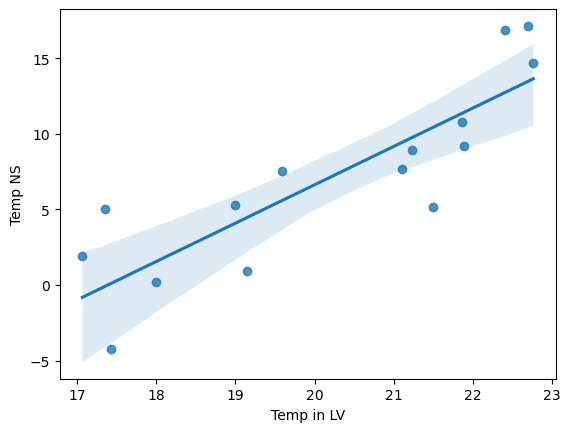

In [65]:
sns. regplot (x = 'Temp in LV', y = 'Temp NS', data = reg_df_sample)

In [80]:
# split the data into targets and features 
y = df['Appliances']

x = df.drop(['Appliances','date', 'lights'], axis=1)

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# this will split the training data into 70/30

In [82]:
# fit model to the training data
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [83]:
# predict the target values for the features test set
y_pred = model.predict(x_test)
y_pred

array([ 45.54761868, 271.20410666,  46.38025696, ...,  83.23836265,
       117.34588177,  71.22751965])

In [86]:
# evaluate the regression metrics for the trained model
mse= mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE =>{round(mse, 3)}')
print(f'R2 =>{round(r2, 3)}')
print(f'MAE =>{round(mae, 3)}')

MSE =>8768.536
R2 =>0.149
MAE =>53.643


In [9]:
# export the trained model
model_filename = './trained_model/reg_model.pkl'

with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

In [11]:
test.tail()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-02-29 05:00:00,50,0,19.29,34.260000,17.29,35.500000,19.7000,36.2900,18.39,33.400000,...,18.166667,41.09,0.00,761.10,87.000000,5.0,40.0,-2.000000,10.768568,10.768568
2016-03-21 16:30:00,60,0,21.10,35.400000,19.60,36.500000,21.7000,35.0900,20.00,35.126667,...,19.426667,36.09,9.40,760.20,63.000000,2.5,34.0,2.650000,25.124145,25.124145
2016-05-05 02:30:00,50,0,22.70,34.590000,20.20,36.500000,23.5000,37.0000,22.60,32.790000,...,20.500000,38.70,7.00,763.65,71.000000,3.5,40.0,2.000000,5.068603,5.068603
2016-03-16 18:30:00,760,30,21.60,41.196667,19.50,38.566667,23.4975,35.3725,21.60,32.500000,...,19.633333,37.73,6.85,764.65,56.500000,7.0,25.5,-1.300000,44.805694,44.805694
2016-04-09 18:40:00,460,10,22.50,40.896667,21.20,39.363333,22.6000,38.7600,20.79,35.590000,...,20.200000,32.79,13.20,748.30,50.666667,6.0,40.0,3.133333,9.017093,9.017093


In [12]:
train.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.198621,0.054565,0.086288,0.118467,-0.060430,0.082005,0.036808,0.037866,0.018283,...,0.008829,-0.052607,0.096732,-0.036332,-0.151551,0.088933,-0.000613,0.013816,-0.009463,-0.009463
lights,0.198621,1.000000,-0.018561,0.102201,-0.001662,0.044457,-0.094613,0.126652,-0.004929,0.106476,...,-0.154708,-0.015463,-0.077226,-0.002966,0.064492,0.053209,0.017957,-0.042460,-0.004168,-0.004168
T1,0.054565,-0.018561,1.000000,0.164068,0.836953,-0.002842,0.892447,-0.026814,0.876855,0.097044,...,0.844595,0.073980,0.679751,-0.149286,-0.344613,-0.086157,-0.077992,0.567561,-0.003441,-0.003441
RH_1,0.086288,0.102201,0.164068,1.000000,0.271679,0.796994,0.254202,0.845439,0.107444,0.881021,...,0.117320,0.764857,0.342853,-0.294249,0.274528,0.207569,-0.020356,0.640750,-0.004831,-0.004831
T2,0.118467,-0.001662,0.836953,0.271679,1.000000,-0.164487,0.735451,0.124813,0.762105,0.233132,...,0.675913,0.160675,0.790150,-0.134056,-0.502512,0.053464,-0.072705,0.581858,-0.007840,-0.007840
RH_2,-0.060430,0.044457,-0.002842,0.796994,-0.164487,1.000000,0.137811,0.678205,-0.046337,0.720510,...,0.055637,0.676394,0.035970,-0.255652,0.583800,0.073431,-0.002817,0.499632,0.001780,0.001780
T3,0.082005,-0.094613,0.892447,0.254202,0.735451,0.137811,1.000000,-0.009551,0.852669,0.122810,...,0.902037,0.137466,0.698065,-0.190504,-0.280888,-0.099248,-0.103294,0.644025,-0.001781,-0.001781
RH_3,0.036808,0.126652,-0.026814,0.845439,0.124813,0.678205,-0.009551,1.000000,-0.138575,0.899779,...,-0.192409,0.834491,0.122027,-0.233807,0.354953,0.264700,0.018407,0.417236,-0.003492,-0.003492
T4,0.037866,-0.004929,0.876855,0.107444,0.762105,-0.046337,0.852669,-0.138575,1.000000,-0.048365,...,0.889847,-0.023727,0.661314,-0.073284,-0.387207,-0.184914,-0.107279,0.517485,0.001102,0.001102
RH_4,0.018283,0.106476,0.097044,0.881021,0.233132,0.720510,0.122810,0.899779,-0.048365,1.000000,...,-0.043380,0.857487,0.295836,-0.251572,0.335923,0.304209,0.003832,0.617619,-0.003943,-0.003943


<Axes: >

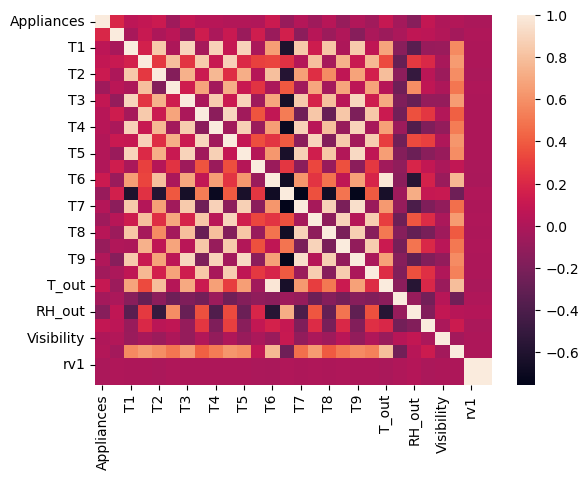

In [13]:
sns.heatmap(df.corr())